In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

### PRE-PROCESSING

#### _Pre-Processing Pertama_
- _sebelum merubah tipe data menjadi float, mereplace koma menjadi titik pada tiap atribut_
- _Dokumentasi Progam_
    - _Ketika tipe data pada kolom adalah object(karena kolom pada dataset ini semuanya object yang harus dirubah menjadi folat), akan langsung replace koma yang biasa(,) menjadi titik untuk merubahnya menjadi tipe data float_

In [3]:
def to_float(column):
    if column.dtype == "object":
        return column.apply(lambda x: x.replace(',', '.') if type(x) == str else x)
    else:
        return column

#### _Pre-Processing Kedua #Merubah File csv menjadi dataframe#_
- _Dokumentasi Progam_
    - _Membuat fungsi dari csv menjadi dataframe menggunakan variabel filepath untuk inputan, karena inputan file itu biasanya string makanya ada tipe data string untuk convert filepathnya_
    - _inisialisasi data untuk menjadi variabel dataframe dan pemisah antar atribut dan kolom yaitu semicolon(;)_
    - _mengatur index dari suatu dataframe yaitu datetime_
    - _merubah data menjadi tipe data float_
    - _merubah semua dataframe menjadi numerik_

In [4]:
def csv_to_df(filepath: str):
    data = pd.read_csv(filepath,sep=';') #Ngebaca File CSV
    data.set_index('date_time', inplace=True)
    data = data.apply(to_float)
    data = data.apply(pd.to_numeric)
    return data

#### _memanggil fungsi diatas untuk di pre-processing menjadi data yang bersih_

In [5]:
data_time_series = csv_to_df('2011-2014/dataset_timeseries.csv')

#### _menyimpan hasil pre-processing pada suatu file csv lagi_

In [6]:
# data_time_series.to_csv("data_time_series_converted.csv")

#### _membaca file csv yang sudah di pre-processing dan menjadikan index yaitu kolom datetime_

In [7]:
data_time_series = pd.read_csv('2011-2014/data_time_series_converted.csv', index_col="date_time")

#### _melihat tipe data_

In [8]:
data_time_series.dtypes

MT_001    float64
MT_002    float64
MT_003    float64
MT_004    float64
MT_005    float64
           ...   
MT_366    float64
MT_367    float64
MT_368    float64
MT_369    float64
MT_370    float64
Length: 370, dtype: object

### K-Means Clustering

##### _membuat machine learning yang bertipe unsupervised yaitu metode k-means clustering_
##### _memuat metode k-means dan jumlah kluster/kelompok sebanyak 3_
##### _fitting terhadap model k-means_

In [11]:
KMeansCluster = KMeans(n_clusters=3)
KMeansCluster.fit(data_time_series)

KMeans(n_clusters=3)

##### _membuat hasil label dari pengelompokkan dari model k-means_

In [12]:
x_label = KMeansCluster.labels_
print(x_label)

[0 0 0 ... 0 0 0]


#### _membuat prediksi dari dataframe menggunakan metode/model k-means_

In [13]:
KMeansCluster.predict(data_time_series)

array([0, 0, 0, ..., 0, 0, 0])

#### _memotong sumbu x dan sumbu y_
#### _Membuat jarak antar centroid pada model k-means dengan cara memotong antara sumbu x dan sumbu y_

In [14]:

xs = data_time_series.iloc[:,0]
ys = data_time_series.iloc[:,1]

centroids = KMeansCluster.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

#### _menampilkan scatter plot biasa tidak menggunakan hasil potongan dan centroid antar x dan y_

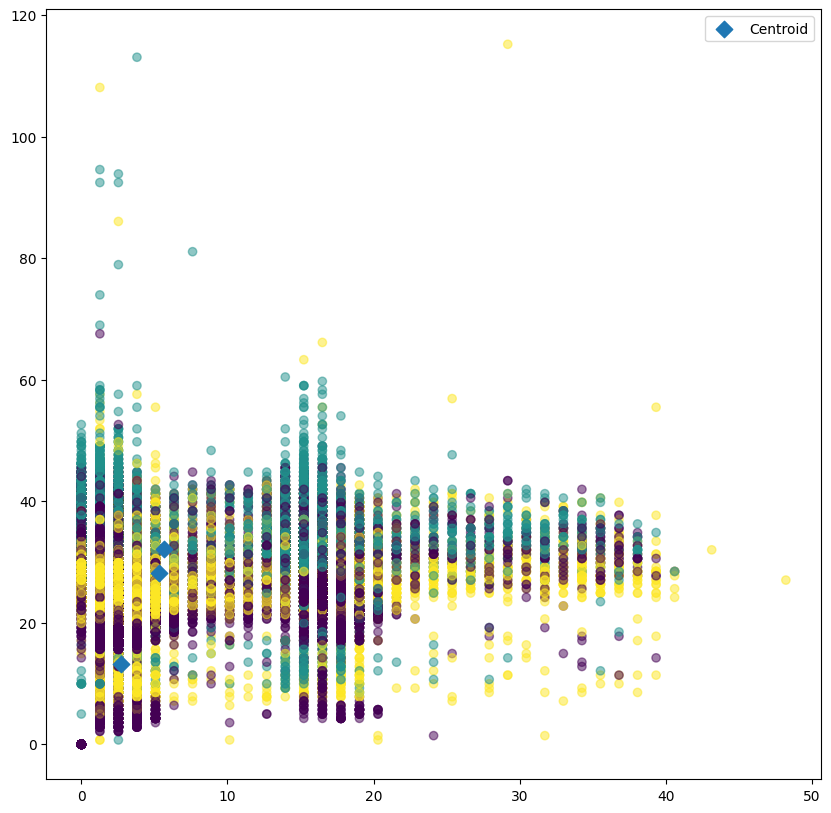

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=x_label)
plt.scatter(centroids_x,centroids_y,marker="D",s=70,label="Centroid")
# plt.xlabel("")
# plt.ylabel("")
plt.legend()
plt.show()

##### _membuat metode elbow pada k-means untuk mengukur jumlah cluster yang ada_

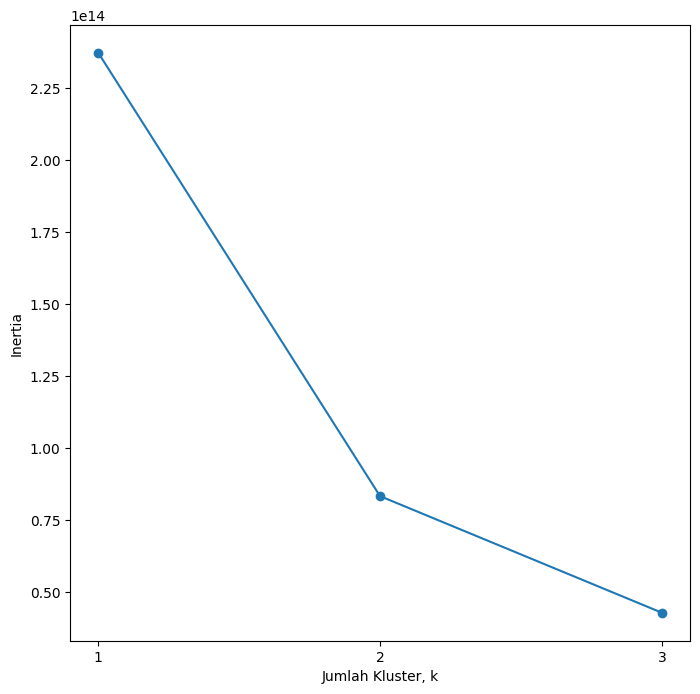

In [16]:
# Metode elbow
ks = range(1, 4)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_time_series)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(8,8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Kluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

#### _mereduksi data atau penggabungan kolom menggunakan TSNE_
- _n components untuk menentukan jumlah dimensi_
- _learning rate pada t-sne diatur auto akan mengatur sesuai dengan datanya supaya lebih aman_
- _init untuk penggabungan kolom, secara random atau pca_

In [17]:
x_digabung = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(data_time_series)

#### _menyimpan model_

In [19]:
# with open('data_time_series_embedded.npy', 'wb') as f:
#     np.save(f, x_digabung)
# x_digabung.to_csv('2011-2014/data_time_series_embedded.csv')

#### _memanggil hasil dari penggabungan menggunakan T-SNE_

In [24]:
x_digabung[:,0]

array([-16.000566, -15.072107, -15.193366, ..., 107.584015, 107.587875,
       107.58776 ], dtype=float32)

#### _Visualisasi hasil dari penggabungan menggunakan T-SNE, dari hasil pemotongan data_

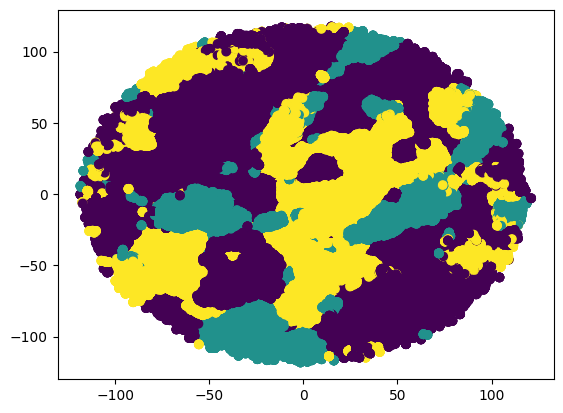

In [26]:
plt.scatter(x_digabung[:,0], x_digabung[:,1], c=x_label)